In [43]:
import matplotlib.pyplot as plt
import math

In [44]:
vx_init = 1              # начальная горизонтальная скорость
vy_init = 5              # начальная вертикальная скорость
coef = 0.7          # потеря энергии
dt = 0.01           # шаг времени
t_limit = 20        # лимит времени
stair_length = 1    # длина ступеньки
stair_height = 1    # высота ступеньки

x_init = 0          # начальное положение мяча
y_init = 0          # начальное положение мяча
g = 9.81            # ускорение свободного падения


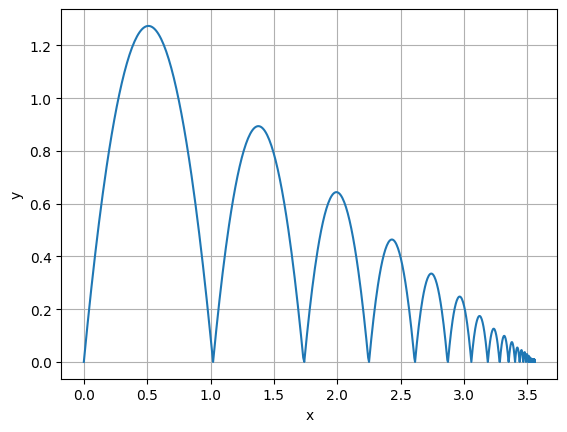

In [45]:
vx = vx_init
vy = vy_init
x0 = x_init         # коорд. при соприкосновении с поверхностью
t = 0               # начальное время
bt = 0              # время с момента соприкосновения

x_list = []
y_list = []

while t < t_limit:
    x = x0 + vx * bt
    y = vy * bt - g * bt**2 / 2

    if y < 0:
        x0 = x
        y = 0  # чтобы мяч не проваливался под ступеньку
        vx *= math.sqrt(coef)
        vy = -math.sqrt(coef) * (vy - g * bt)
        bt = 0

    t += dt
    bt += dt

    x_list.append(x)
    y_list.append(y)

plt.plot(x_list, y_list)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

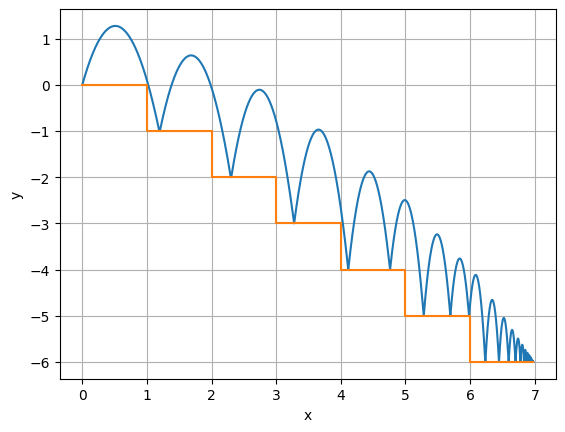

In [46]:
vx = vx_init
vy = vy_init
x0 = x_init         # коорд. при соприкосновении с поверхностью
y0 = y_init         # коорд. при соприкосновении с поверхностью
t = 0               # начальное время
bt = 0              # время с момента соприкосновения

x_list = []
y_list = []

while t < t_limit:
    x = x0 + vx * bt
    y = y0 + vy * bt - g * bt**2 / 2
    floor = -stair_height * math.floor(x / stair_length)

    if y < floor:
        x0 = x
        y0 = floor
        y = floor  # чтобы мяч не проваливался под ступеньку
        vx *= math.sqrt(coef)
        vy = -math.sqrt(coef) * (vy - g * bt)
        bt = 0

    t += dt
    bt += dt

    x_list.append(x)
    y_list.append(y)

# для визуализации лестницы
stairs_n = int(x / stair_length) + 1
stairs_x = [x_init, stair_length]
stairs_y = [y_init, y_init]
for i in range(1, stairs_n):
    stairs_x += [i * stair_length, (i + 1) * stair_length]
    stairs_y += [y_init - i * stair_height, y_init - i * stair_height]
stairs_x[-1] = x

plt.plot(x_list, y_list)
plt.plot(stairs_x, stairs_y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()